In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import planetengine
outputPath = planetengine.paths.make_testdir()
from planetengine import quickShow
from planetengine import functions as pfn

In [75]:
system = planetengine.tests.testsystems.arrhenius(Ra = 1e7, res = 64, eta0 = 1e1)

Fitted 1 variables to the figure.


In [76]:
temperature = pfn.convert(system.temperatureField)
velocity = pfn.convert(system.velocityField)
stress = velocity * system.viscosityFn

Fitted 1 variables to the figure.
Variable_varName=anon{}



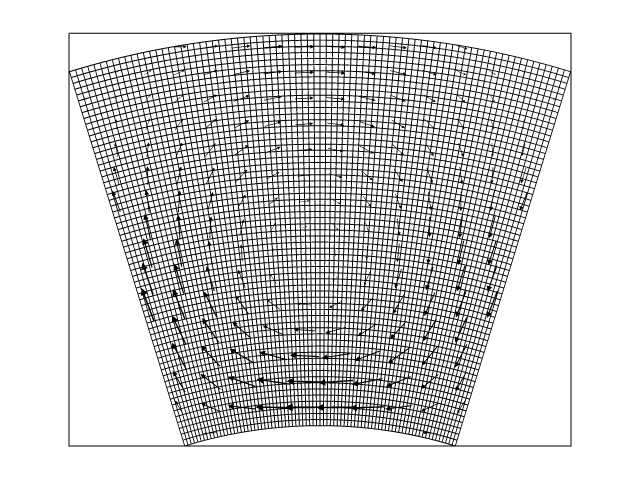

In [77]:
quickShow(velocity, system.mesh)

In [123]:
_var = velocity
# _var = fn.tensor.second_invariant(fn.tensor.symmetric(velocity.gradient()))
_var = pfn.Component.ang(_var)
_var = pfn.Gradient.ang(_var)
_var = pfn.Surface.outer(_var)
_var = pfn.Select(pfn.Quantiles.quintiles(_var), 5., _var)
_var = pfn.HandleNaN.zeroes(_var)

Fitted 2 variables to the figure.
HandleNaN{Select{Quantiles_ntiles=5{Surface_surface=outer{Component_component=ang{Gradient{Projection{Component_component=ang{Variable_varName=anon{}}}}}}};Constant_val=arr{[ 5.]}{};Surface_surface=outer{Component_component=ang{Gradient{Projection{Component_component=ang{Variable_varName=anon{}}}}}}};Constant_val=arr{[ 0.]}{}}
Variable_varName=anon{}



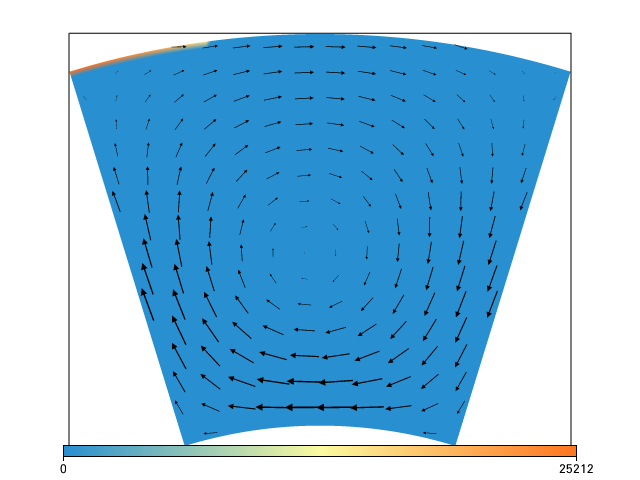

In [124]:
quickShow(_var, velocity)

In [81]:
from underworld import function as fn

In [121]:
from underworld import function as fn
def testfn():
    symmetric = fn.tensor.symmetric(
        system.velocityField.fn_gradient
        )
from timeit import timeit
print(timeit(testfn, number = 100) / 100.)

0.024794686000004732


In [125]:
import underworld as uw
def testfn():
    myfn = uw.utils.Integral(_var, system.mesh)
from timeit import timeit
print(timeit(testfn, number = 100) / 100.)

0.08884821800000281


In [126]:
import underworld as uw
def testfn():
    myfn = pfn.Integral(_var)
from timeit import timeit
print(timeit(testfn, number = 100) / 100.)

0.7321136659999865


In [115]:
symmetric.evaluate(system.mesh)

array([[ 61496.62420213, -62394.17991007, -41537.58956604],
       [ 90025.34073391, -35478.38954645, -86170.60175608],
       [ 88052.87725992, -33169.25941631, -84789.86158786],
       ..., 
       [-89556.69405839,  -9784.19186339,  17275.46206994],
       [-89757.69031756,  -9599.1223588 ,  17158.32829604],
       [ 20185.41395749, -21933.28929832,  14056.22983572]])

In [127]:
help(fn.tensor.symmetric)

Help on class symmetric in module underworld.function.tensor:

class symmetric(underworld.function._function.Function)
 |  This function calculates the symmetric part of a tensor and returns
 |  it as a symmetric tensor. The function generated by this class returns
 |  objects of type SymmetricTensorType.
 |  
 |  .. math::
 |       v_{ij} = \tfrac{1}{2} ( u_{ij} + u_{ji} )
 |       
 |  Parameters
 |  ----------
 |  fn: underworld.function.Function
 |      The function which provides the required tensor. This function
 |      must return objects of type TensorType.
 |  
 |  Method resolution order:
 |      symmetric
 |      underworld.function._function.Function
 |      underworld._stgermain.LeftOverParamsChecker
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attrib

Fitted 1 variables to the figure.
Vanilla{Variable_varName=anon{}}



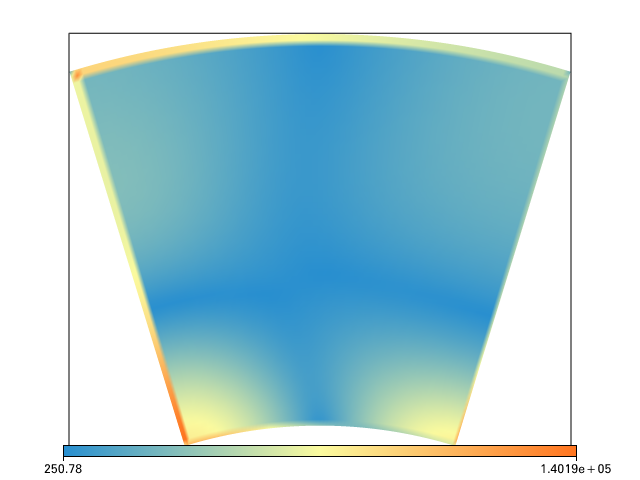

In [96]:
quickShow(fn.tensor.second_invariant(symmetric))

In [95]:
help(fn.tensor.second_invariant)

Help on class second_invariant in module underworld.function.tensor:

class second_invariant(underworld.function._function.Function)
 |  This function calculates the second invariant of (symmetric)tensor provided
 |  by the subject function. The function generated by this class returns 
 |  objects of type ScalarType.
 |  
 |  .. math::
 |       u = \sqrt{ \tfrac{1}{2} u_{ij} u_{ij} }
 |       
 |  Parameters
 |  ----------
 |  fn: underworld.function.Function
 |      The function which provides the required tensor. This function
 |      must return objects of type TensorType or SymmetricTensorType.
 |  
 |  Method resolution order:
 |      second_invariant
 |      underworld.function._function.Function
 |      underworld._stgermain.LeftOverParamsChecker
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  -------------------------------------------------------